## Import Packages & Load Data

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='ticks',color_codes=True,font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from scipy.special import boxcox1p


In [2]:
train = pd.read_csv('housing_train.csv')
train.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al


In [3]:
train_Id = train['id']
train.drop('id',axis=1,inplace = True)

# Exploratory Data Analysis

In [4]:
train.shape

(265190, 21)

In [5]:
train.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,2.651900e+05,2.651900e+05,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,263771.000000,263771.000000
mean,1.227285e+04,1.093678e+03,1.912414,1.483468,0.716822,0.696550,0.733896,0.078759,0.014360,0.048644,37.208855,-92.398149
std,5.376352e+06,2.306888e+04,3.691900,0.630208,0.450543,0.459749,0.441920,0.269362,0.118968,0.215124,5.659648,17.370780
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,8.170000e+02,7.520000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.508500,-104.704000
50%,1.060000e+03,9.500000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.984900,-86.478300
75%,1.450000e+03,1.156000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.168400,-81.284600
max,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


In [6]:
def analysis(df, target):
    instance = df.shape[0]
    types=df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.T.apply(pd.Series.unique,1)
    nulls= df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(pd.Series.nunique)
    null_perc = (df.isnull().sum()/instance)*100
    skewness = df.skew()
    kurtosis = df.kurt()
    
    corr = df.corr()[target]
    str = pd.concat([types, counts,uniques, nulls,distincts, null_perc, skewness, kurtosis, corr], axis = 1, sort=False)
    corr_col = 'corr '  + target
    cols = ['types', 'counts','uniques', 'nulls','distincts', 'null_perc', 'skewness', 'kurtosis', corr_col ]
    str.columns = cols
    return str

In [7]:
details = analysis(train,'price')
details

,types,counts,uniques,nulls,distincts,null_perc,skewness,kurtosis,corr price
url,object,265190,[https://bham.craigslist.org/apa/d/birmingham-...,0,265190,0.000000,NaN,NaN,NaN
region,object,265190,"[birmingham, huntsville / decatur, dothan, mob...",0,298,0.000000,NaN,NaN,NaN
region_url,object,265190,"[https://bham.craigslist.org, https://huntsvil...",0,305,0.000000,NaN,NaN,NaN
price,int64,265190,"[1195, 1120, 825, 800, 785, 900, 925, 1085, 12...",0,3753,0.000000,514.780933,265062.432268,1.000000
type,object,265190,"[apartment, house, manufactured, townhouse, co...",0,12,0.000000,NaN,NaN,NaN
sqfeet,int64,265190,"[1908, 1319, 1133, 927, 1047, 1298, 1350, 2308...",0,3037,0.000000,340.467541,120492.280883,0.000006
beds,int64,265190,"[3, 1, 2, 4, 0, 5, 6, 7, 8, 1000, 1100]",0,11,0.000000,272.959497,79164.809146,0.000062
baths,float64,265190,"[2.0, 1.5, 1.0, 2.5, 0.0, 3.0, 3.5, 4.0, 4.5, ...",0,19,0.000000,13.323474,1427.809871,0.000151
cats_allowed,int64,265190,"[1, 0]",0,2,0.000000,-0.962499,-1.073604,0.001206
dogs_allowed,int64,265190,"[1, 0]",0,2,0.000000,-0.855037,-1.268921,0.001230


#### Types of data
Int : 10  
float : 3   
object : 9

#### Highly skewed and heavy tail distributed features:
price  
beds   
sqfeet  
bath   
electric_vehicle_charge  
possibly outliers  
We may apply boxcox or log transformation on the above feature

#### Features with Null values:
laundry_options  
parking_options	   
description  
lat  
long  
state  

No much correlation between independent features and target


In [8]:
# lets see our numerical features
num_features = [feat for feat in train.columns if train[feat].dtypes != 'O']
num_features

['price',
 'sqfeet',
 'beds',
 'baths',
 'cats_allowed',
 'dogs_allowed',
 'smoking_allowed',
 'wheelchair_access',
 'electric_vehicle_charge',
 'comes_furnished',
 'lat',
 'long']

In [9]:
# lets see our categorical features
cat_features = [feat for feat in train.columns if train[feat].dtypes == 'O']
cat_features

['url',
 'region',
 'region_url',
 'type',
 'laundry_options',
 'parking_options',
 'image_url',
 'description',
 'state']

### Analyzing Sqfeet feature

Text(0.5, 1.0, 'Skewness: 340.46754078957565 and Kurtosis: 120492.28088280167')

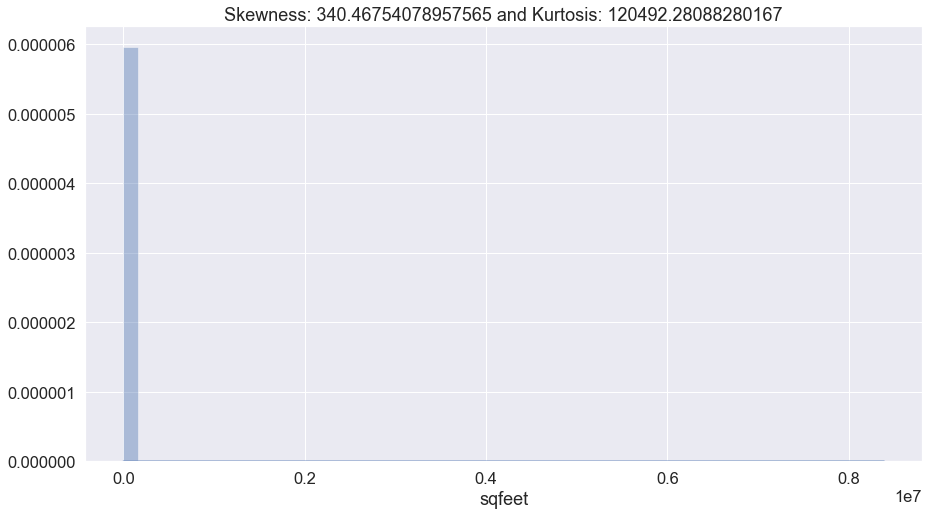

In [10]:
plt.figure(figsize=(15,8))

sns.distplot(train['sqfeet'],kde=True,norm_hist=True)
plt.title('Skewness: {} and Kurtosis: {}'.format(train['sqfeet'].skew(),train['sqfeet'].kurtosis()))

The feature sqfeet is highly positively skewed and has a heavy tailed distribution. There is high probability of outliers presence.

sqfeet Skewness: 340.468 and Kurtosis: 120492.281
price Skewness: 514.781 and Kurtosis: 265062.432


(265190, 21)

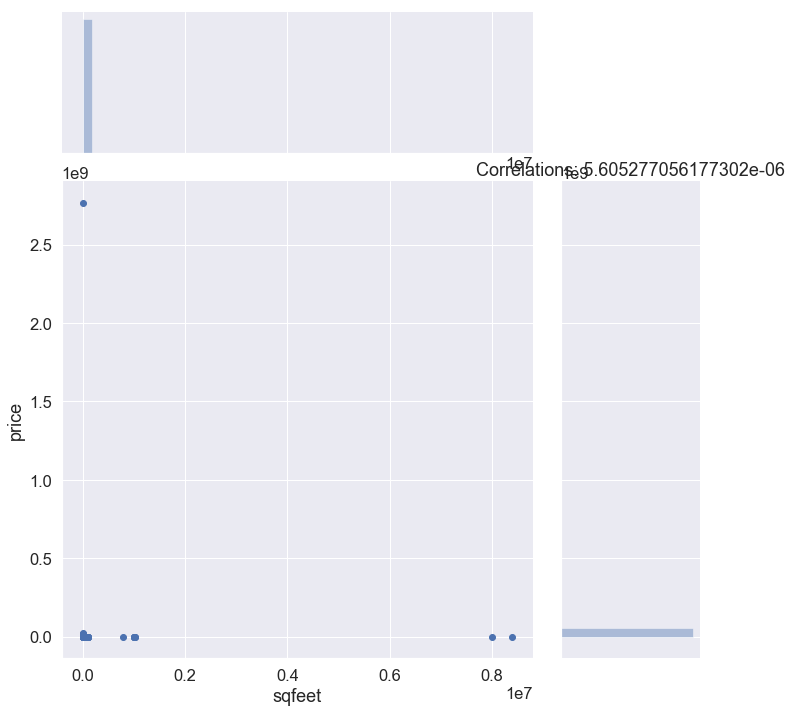

In [11]:
sns.jointplot(x=train['sqfeet'],y=train['price'],height=10,ratio=3)
print('sqfeet Skewness: {:.3f} and Kurtosis: {:.3f}'.format(train['sqfeet'].skew(),train['sqfeet'].kurtosis()))
print('price Skewness: {:.3f} and Kurtosis: {:.3f}'.format(train['price'].skew(),train['price'].kurtosis()))
plt.title('Correlations: {}'.format(train['sqfeet'].corr(train['price'])))
train.shape

sqfeet Skewness: 2.406 and Kurtosis: 14.664
price Skewness: 4.043 and Kurtosis: 46.989


(264971, 21)

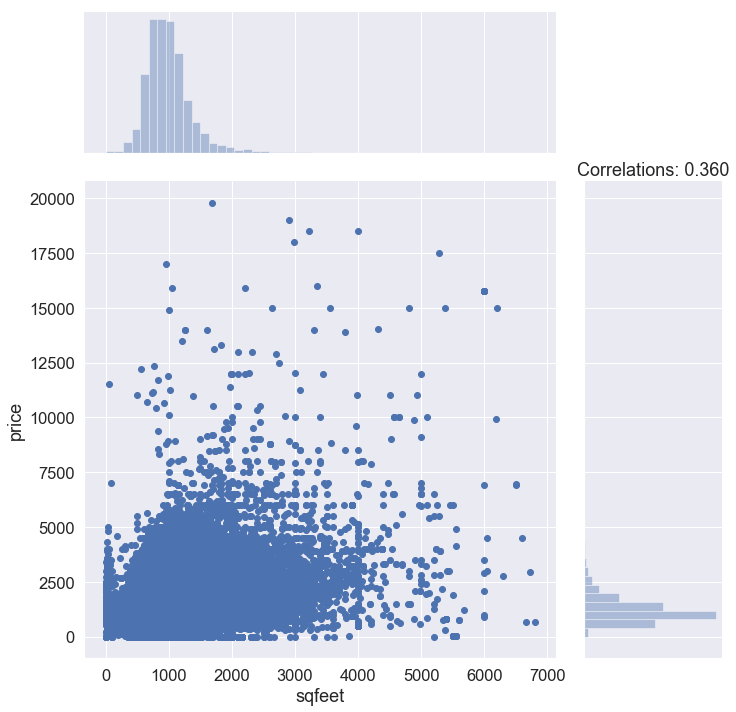

In [12]:
data=train.copy()
data= data[data['sqfeet']<data['sqfeet'].quantile(0.9996)]
data = data[data['price']<data['price'].quantile(0.9996)]

sns.jointplot(x=data['sqfeet'],y=data['price'],height=10,ratio=3)
print('sqfeet Skewness: {:.3f} and Kurtosis: {:.3f}'.format(data['sqfeet'].skew(),data['sqfeet'].kurtosis()))
print('price Skewness: {:.3f} and Kurtosis: {:.3f}'.format(data['price'].skew(),data['price'].kurtosis()))
plt.title('Correlations: {:.3f}'.format(data['sqfeet'].corr(data['price'])))
data.shape

### Analyzing beds feature

In [13]:
train['beds'].value_counts()

2       120149
1        80527
3        46968
4         8177
0         7529
5         1590
6          185
7           40
8           22
1100         2
1000         1
Name: beds, dtype: int64

Skewness: 272.959 
Kurtosis: 79164.809


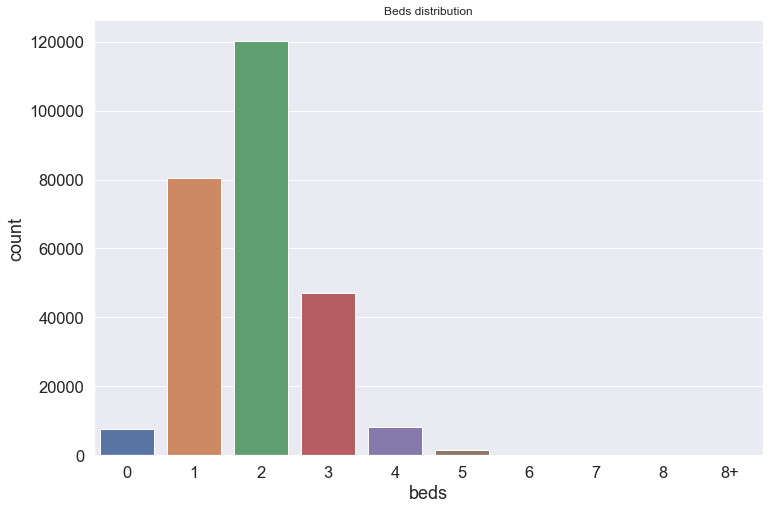

In [14]:
data = train.copy()
data.loc[data['beds']>8]='8+'
plt.figure(figsize=(12,8))
sns.countplot(data['beds'].astype('str').sort_values())
plt.title('Beds distribution',fontsize=12)
print('Skewness: {:.3f} \nKurtosis: {:.3f}'.format(train['beds'].skew(),train['beds'].kurtosis()))
plt.show()

price Skewness: 0.535 and Kurtosis: 0.924


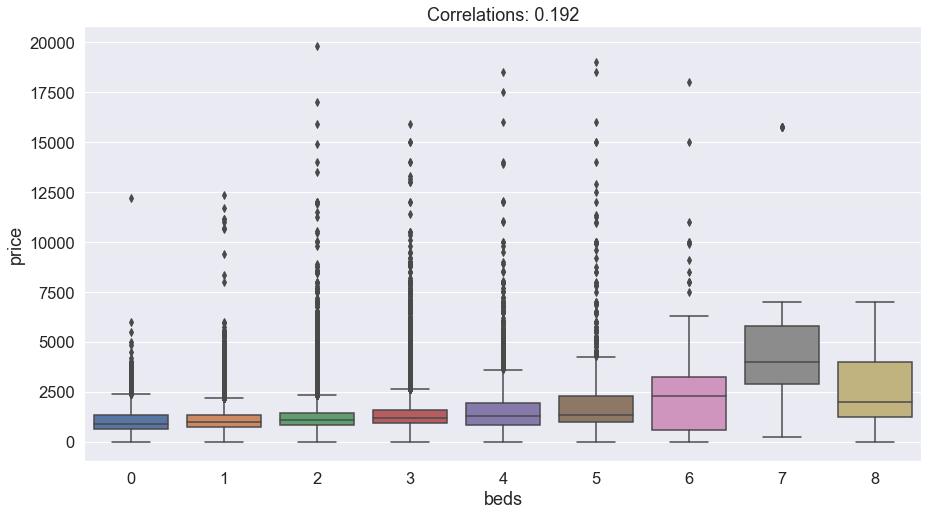

In [15]:
data = train.copy()
data = data[data['price']<data['price'].quantile(0.9996)]
data = data[data['beds']<10]
plt.figure(figsize=(15,8))
sns.boxplot(x='beds',y='price',data=data)
plt.title('Correlations: {:.3f}'.format(data['beds'].corr(data['price'])))
print('price Skewness: {:.3f} and Kurtosis: {:.3f}'.format(data['beds'].skew(),data['beds'].kurtosis()))

### Analyzing Bath Feature

In [16]:
train['baths'].value_counts()

1.0     136375
2.0      93726
1.5      18476
2.5       8185
3.0       4272
0.0       2045
4.0       1147
3.5        652
4.5        145
5.0        108
5.5         28
6.0         17
6.5          4
7.0          4
75.0         2
8.0          1
35.0         1
8.5          1
7.5          1
Name: baths, dtype: int64

Skewness: 13.323 
Kurtosis: 1427.810


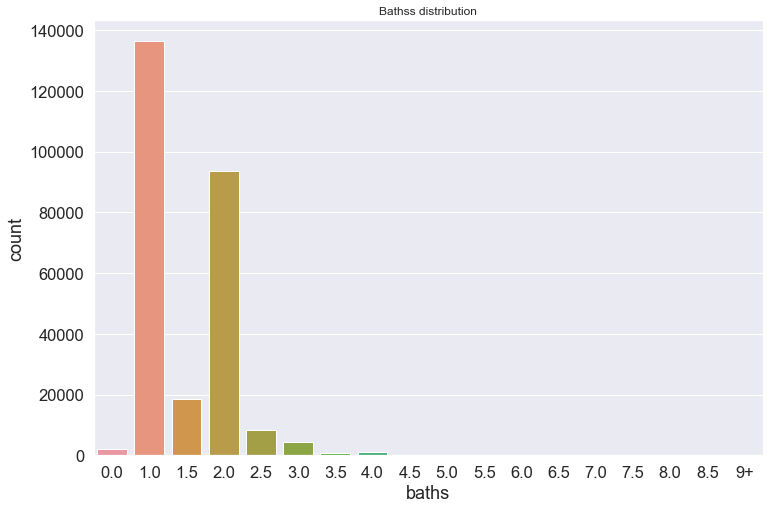

In [17]:
data = train.copy()
data.loc[data['baths']> 8.5]='9+'
plt.figure(figsize=(12,8))
sns.countplot(data['baths'].astype('str').sort_values())
plt.title('Bathss distribution',fontsize=12)
print('Skewness: {:.3f} \nKurtosis: {:.3f}'.format(train['baths'].skew(),train['baths'].kurtosis()))
plt.show()

price Skewness: 0.933 and Kurtosis: 1.977


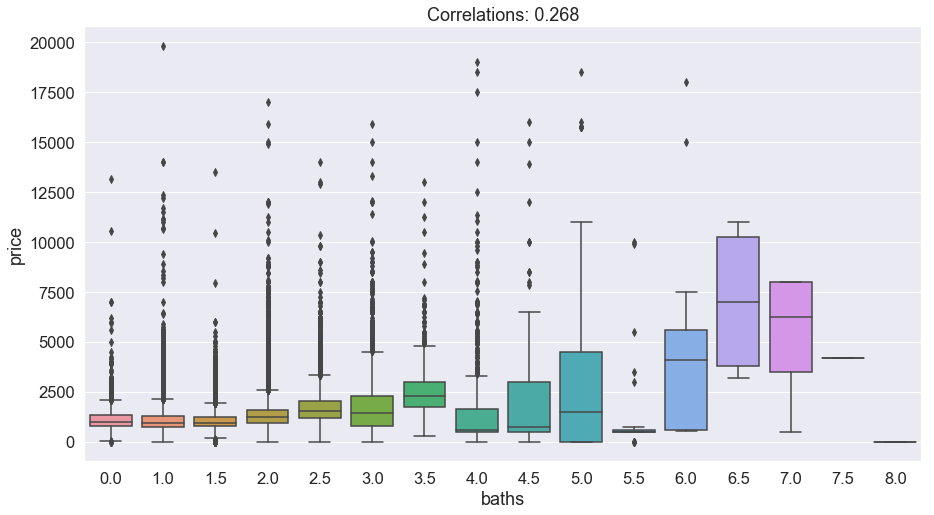

In [18]:
data = train.copy()
data = data[data['price']<data['price'].quantile(0.9996)]
data = data[data['baths']<10]
plt.figure(figsize=(15,8))
sns.boxplot(x='baths',y='price',data=data)
plt.title('Correlations: {:.3f}'.format(data['baths'].corr(data['price'])))
print('price Skewness: {:.3f} and Kurtosis: {:.3f}'.format(data['baths'].skew(),data['baths'].kurtosis()))

### Analyzing boolean features

In [19]:
bool_features = [x for x in num_features if train[x].nunique() < 3]
bool_features

['cats_allowed',
 'dogs_allowed',
 'smoking_allowed',
 'wheelchair_access',
 'electric_vehicle_charge',
 'comes_furnished']

In [20]:
# we will use median for skewed and mean for normally distributed feature
skewed_bool_features = ['wheelchair_access',
 'electric_vehicle_charge',
 'comes_furnished']

Correlation: 0.081


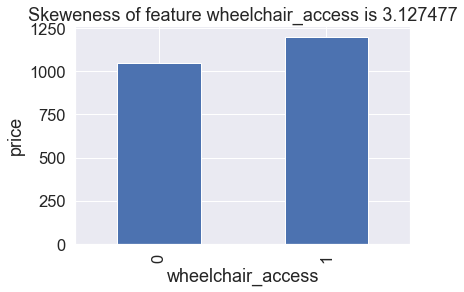

Correlation: 0.131


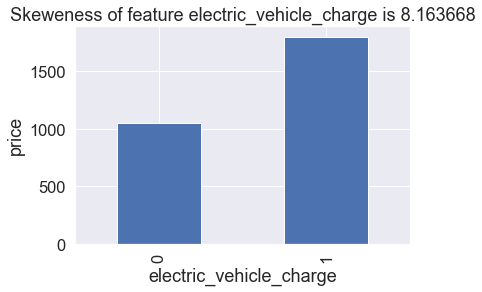

Correlation: 0.045


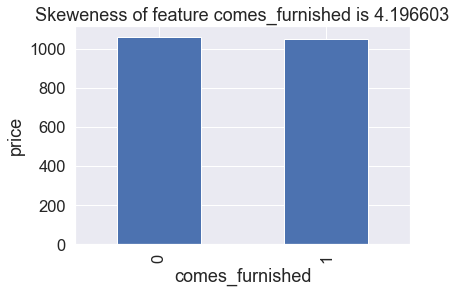

In [21]:
for feature in skewed_bool_features:
    data=train.copy()
    data = data[data['price']<data['price'].quantile(0.9996)]
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.title('Skeweness of feature {} is {:.6f}'.format(feature,data[feature].skew()))
    plt.ylabel('price')
    print('Correlation: {:.3f}'.format(data[feature].corr(data['price'])))
    plt.show()

Correlation: -0.048


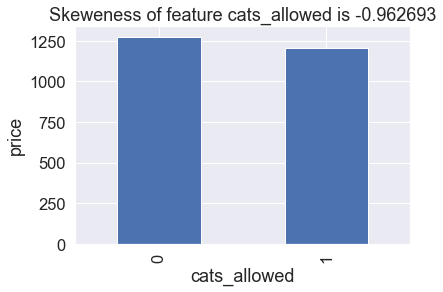

Correlation: -0.039


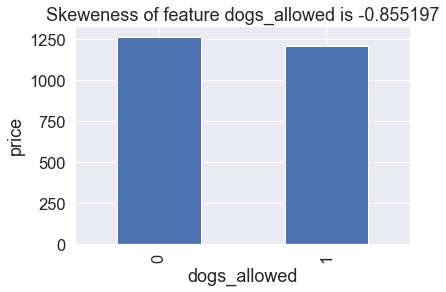

Correlation: -0.154


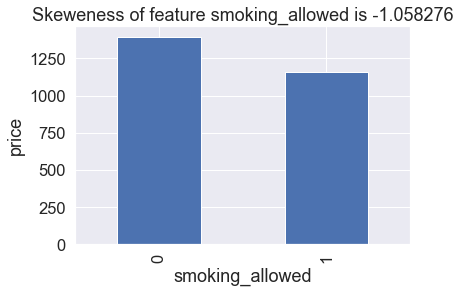

In [22]:
normal_bool_features=['cats_allowed',
 'dogs_allowed',
 'smoking_allowed']
for feature in normal_bool_features:
    data=train.copy()
    data = data[data['price']<data['price'].quantile(0.9996)]
    data.groupby(feature)['price'].mean().plot.bar()
    plt.xlabel(feature)
    plt.title('Skeweness of feature {} is {:.6f}'.format(feature,data[feature].skew()))
    plt.ylabel('price')
    print('Correlation: {:.3f}'.format(data[feature].corr(data['price'])))
    plt.show()

### Analyzing categorical featuress

In [23]:
# lets see our categorical features
cat_features = [feat for feat in train.columns if train[feat].dtypes == 'O']
cat_features = [feat for feat in cat_features if 'url' not in feat]
cat_features

['region',
 'type',
 'laundry_options',
 'parking_options',
 'description',
 'state']

#### Analyzing Type Feature

In [24]:
train['type'].unique()

array(['apartment', 'house', 'manufactured', 'townhouse', 'condo',
       'duplex', 'flat', 'cottage/cabin', 'in-law', 'loft', 'land',
       'assisted living'], dtype=object)

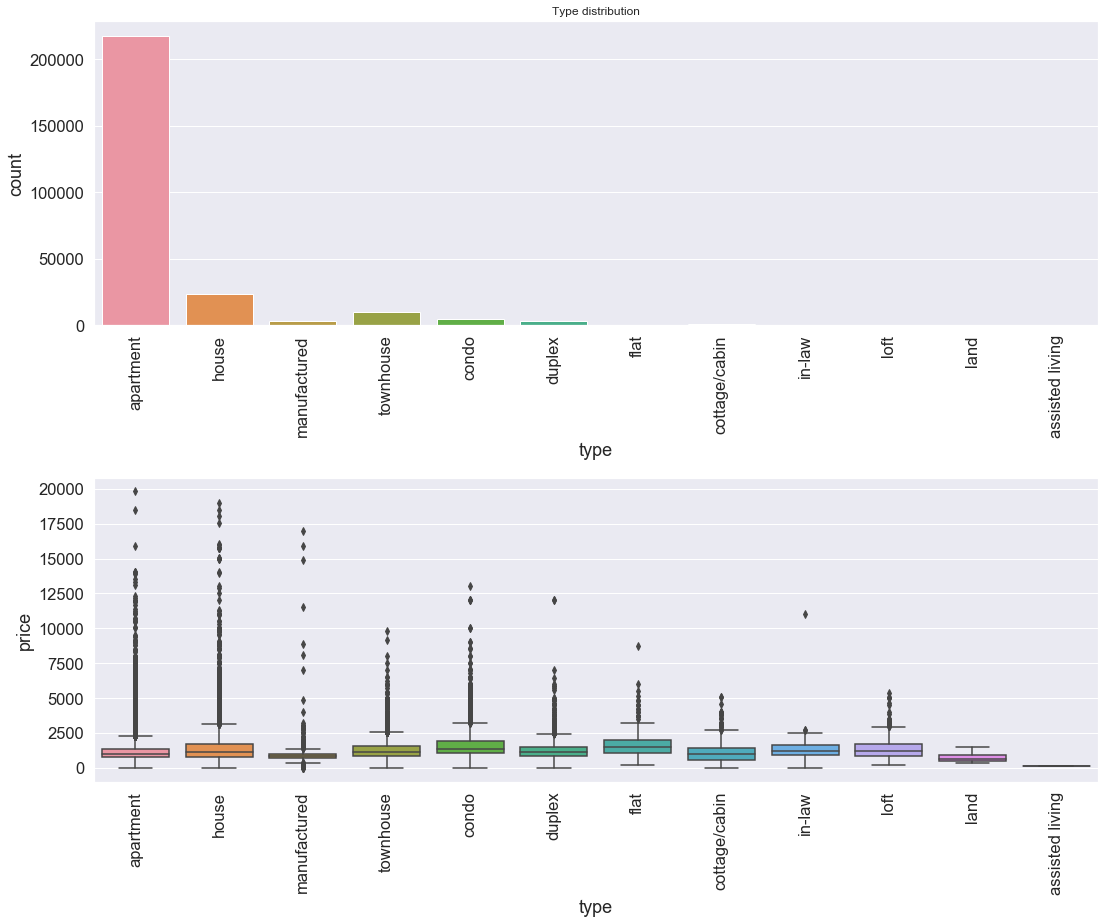

In [25]:
data = train.copy()
data = data[data['price']<data['price'].quantile(0.9996)]
fig=plt.figure(figsize=(18,14))
plt.subplots_adjust(hspace=0.5)
ax1 = fig.add_subplot(211);
sns.countplot(data['type'])
plt.title('Type distribution',fontsize=12)
plt.xticks(rotation=90)
ax2 =fig.add_subplot(212);
sns.boxplot(x='type',y='price',data=data)
plt.xticks(rotation=90)
plt.show()

####  Analyzing parking_options Feature

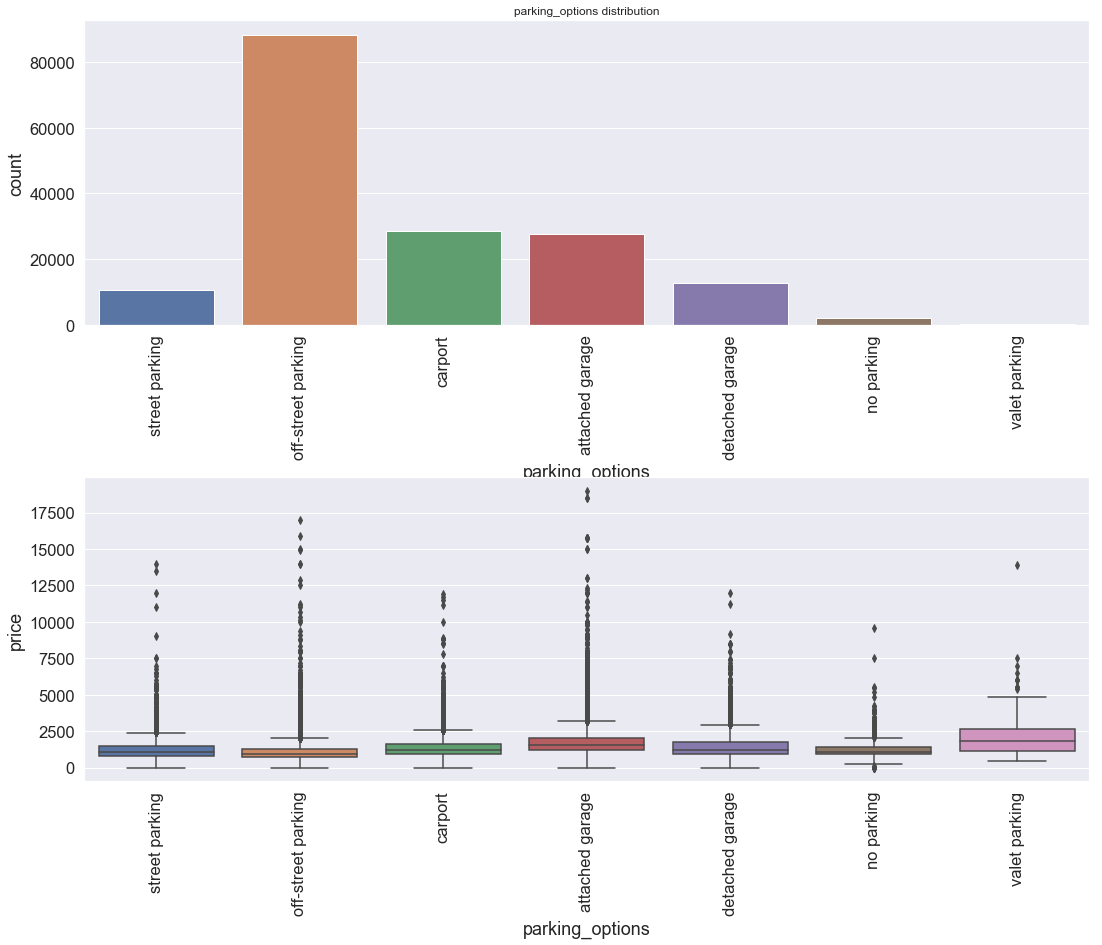

In [26]:
data = train.copy()
data = data[data['price']<data['price'].quantile(0.9996)]
fig=plt.figure(figsize=(18,14))
plt.subplots_adjust(hspace=0.5)
ax1 = fig.add_subplot(211);
sns.countplot(data['parking_options'])
plt.title('parking_options distribution',fontsize=12)
plt.xticks(rotation=90)
ax2 =fig.add_subplot(212);
sns.boxplot(x='parking_options',y='price',data=data)
plt.xticks(rotation=90)
plt.show()

####  Analyzing laundry_options Feature

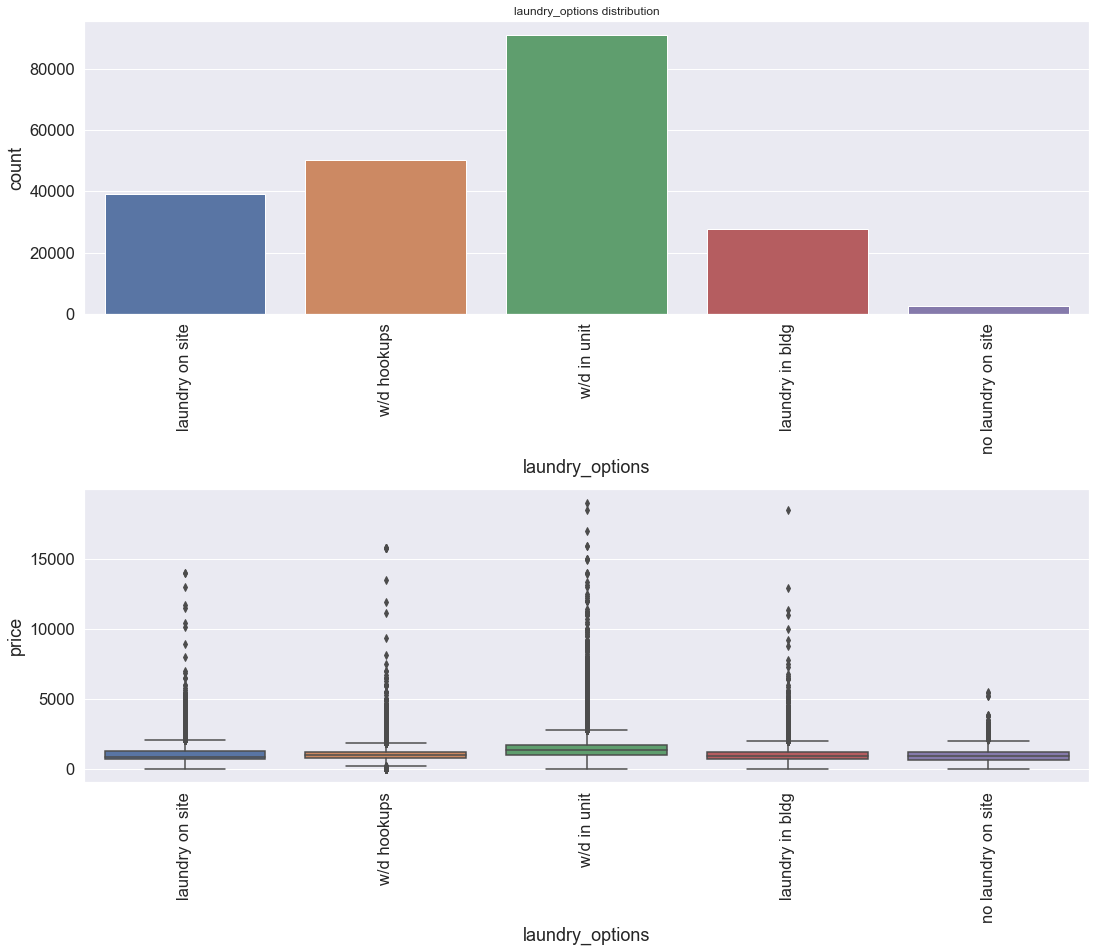

In [27]:
data = train.copy()
data = data[data['price']<data['price'].quantile(0.9996)]
fig=plt.figure(figsize=(18,14))
plt.subplots_adjust(hspace=0.6)
ax1 = fig.add_subplot(211);
sns.countplot(data['laundry_options'])
plt.title('laundry_options distribution',fontsize=12)
plt.xticks(rotation=90)
ax2 =fig.add_subplot(212);
sns.boxplot(x='laundry_options',y='price',data=data)
plt.xticks(rotation=90)
plt.show()

####  Analyzing region Feature

In [28]:
train['region'].value_counts()

jacksonville               4246
rochester                  3677
fayetteville               3652
omaha / council bluffs     2727
denver                     2671
savannah / hinesville      2621
boulder                    2614
ventura county             2579
stockton                   2571
fort collins / north CO    2567
orlando                    2564
inland empire              2561
lincoln                    2550
reno / tahoe               2536
augusta                    2529
colorado springs           2522
jackson                    2521
space coast                2509
washington, DC             2502
tucson                     2466
minneapolis / st paul      2463
charlotte                  2455
sarasota-bradenton         2453
grand rapids               2406
st louis, MO               2391
orange county              2388
daytona beach              2388
sacramento                 2385
raleigh / durham / CH      2368
lakeland                   2357
                           ... 
mason ci

####  Analyzing state Feature

In [29]:
train['state'].value_counts()

ca    33085
fl    31929
nc    18628
mi    14529
ga    13841
co    11308
ny     9991
il     9706
ks     7910
ia     7488
mn     7468
md     7451
la     7304
az     6752
oh     6558
in     6416
al     6198
nj     5711
ky     5419
ms     4973
ma     4926
id     4466
ct     3765
nd     3428
ar     3149
nm     2917
nv     2846
ne     2697
dc     2502
ak     2169
mo     2158
de     2048
hi     1840
nh     1761
mt     1339
me      420
ok       49
or       44
Name: state, dtype: int64

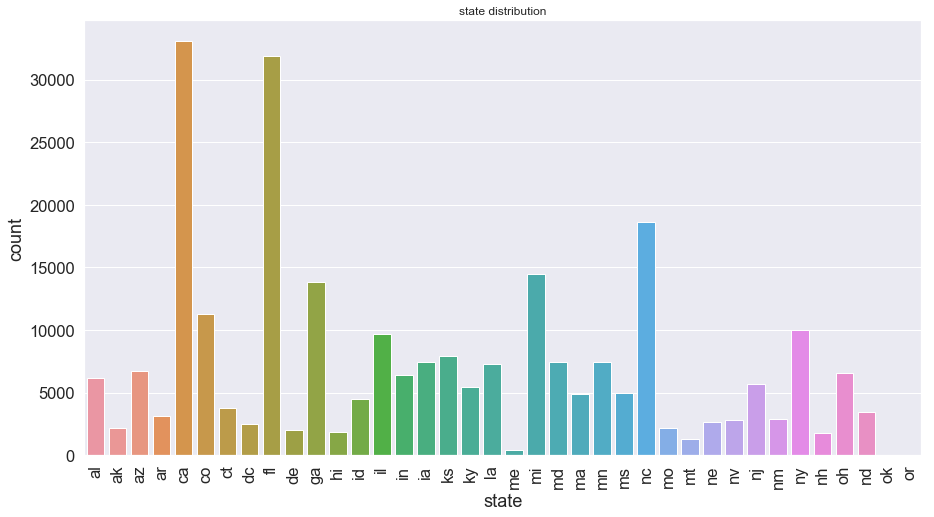

In [30]:
data = train.copy()
data = data[data['price']<data['price'].quantile(0.9996)]
plt.figure(figsize=(15,8))
sns.countplot(data['state'])
plt.title('state distribution',fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [31]:
data = train.copy()
data.loc[data['state']=='ga'].sort_values(by='price',ascending=False).head() # remove the outlier

,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
110953,https://columbusga.craigslist.org/apa/d/columb...,columbus,https://columbusga.craigslist.org,2768307249,apartment,1118,2,1.5,1,1,1,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00V0V_7KSQPod9NT...,Club Hill has a Raleigh Floorplan ready for Pr...,32.4779,-84.8980,ga
106522,https://atlanta.craigslist.org/atl/apa/d/atlan...,atlanta,https://atlanta.craigslist.org,5999,flat,1923,2,2.5,1,1,0,1,1,0,w/d in unit,detached garage,https://images.craigslist.org/00c0c_3tKt5HFVAm...,Over the top superb living in Midtown's Luxury...,33.7984,-84.3883,ga
105099,https://atlanta.craigslist.org/atl/apa/d/atlan...,atlanta,https://atlanta.craigslist.org,4895,flat,1762,3,2.5,1,1,1,1,1,0,w/d in unit,attached garage,https://images.craigslist.org/00n0n_df2zYXrGJt...,Amazing upscale Three Bedroom in Buckhead prem...,33.8320,-84.3851,ga
105160,https://atlanta.craigslist.org/atl/apa/d/atlan...,atlanta,https://atlanta.craigslist.org,4822,flat,1804,3,2.5,1,1,0,1,1,0,w/d in unit,attached garage,https://images.craigslist.org/00B0B_acIoiuA2im...,THREE BEDROOM EXCLUSIVE HIGH RISE - show cont...,33.8482,-84.3582,ga
106189,https://atlanta.craigslist.org/atl/apa/d/atlan...,atlanta,https://atlanta.craigslist.org,4175,house,1968,3,3.5,1,1,0,0,0,1,laundry on site,attached garage,https://images.craigslist.org/00a0a_4DfQIfmYUA...,Beautifully furnished and updated home in the ...,33.8852,-84.3992,ga


In [32]:
train.drop(110953,inplace=True)
train.loc[data['state']=='ga'].sort_values(by='price',ascending=False).head()

,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
106522,https://atlanta.craigslist.org/atl/apa/d/atlan...,atlanta,https://atlanta.craigslist.org,5999,flat,1923,2,2.5,1,1,0,1,1,0,w/d in unit,detached garage,https://images.craigslist.org/00c0c_3tKt5HFVAm...,Over the top superb living in Midtown's Luxury...,33.7984,-84.3883,ga
105099,https://atlanta.craigslist.org/atl/apa/d/atlan...,atlanta,https://atlanta.craigslist.org,4895,flat,1762,3,2.5,1,1,1,1,1,0,w/d in unit,attached garage,https://images.craigslist.org/00n0n_df2zYXrGJt...,Amazing upscale Three Bedroom in Buckhead prem...,33.8320,-84.3851,ga
105160,https://atlanta.craigslist.org/atl/apa/d/atlan...,atlanta,https://atlanta.craigslist.org,4822,flat,1804,3,2.5,1,1,0,1,1,0,w/d in unit,attached garage,https://images.craigslist.org/00B0B_acIoiuA2im...,THREE BEDROOM EXCLUSIVE HIGH RISE - show cont...,33.8482,-84.3582,ga
106189,https://atlanta.craigslist.org/atl/apa/d/atlan...,atlanta,https://atlanta.craigslist.org,4175,house,1968,3,3.5,1,1,0,0,0,1,laundry on site,attached garage,https://images.craigslist.org/00a0a_4DfQIfmYUA...,Beautifully furnished and updated home in the ...,33.8852,-84.3992,ga
105589,https://atlanta.craigslist.org/atl/apa/d/atlan...,atlanta,https://atlanta.craigslist.org,3754,apartment,1437,3,2.0,1,1,0,1,1,0,w/d in unit,attached garage,https://images.craigslist.org/00k0k_5CsBSVwAzj...,Modera Buckhead\t\t\t\t\t\thttp://moderabuckhe...,33.8376,-84.3682,ga


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

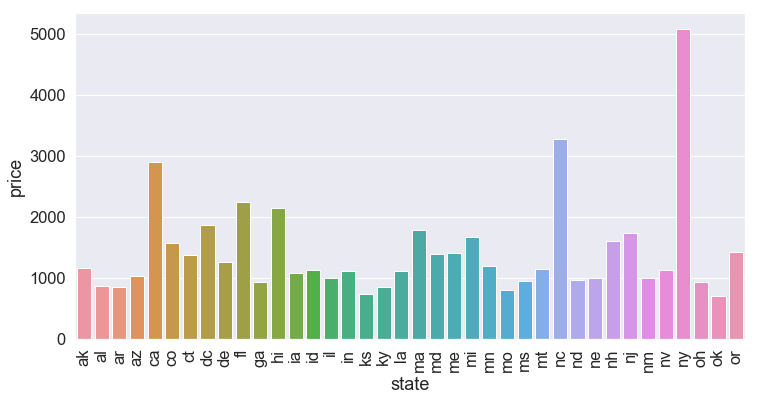

In [33]:
temp=pd.DataFrame(train.groupby('state')['price'].mean()).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='state',y='price',data=temp)
plt.xticks(rotation=90)

### Correlation heatmap

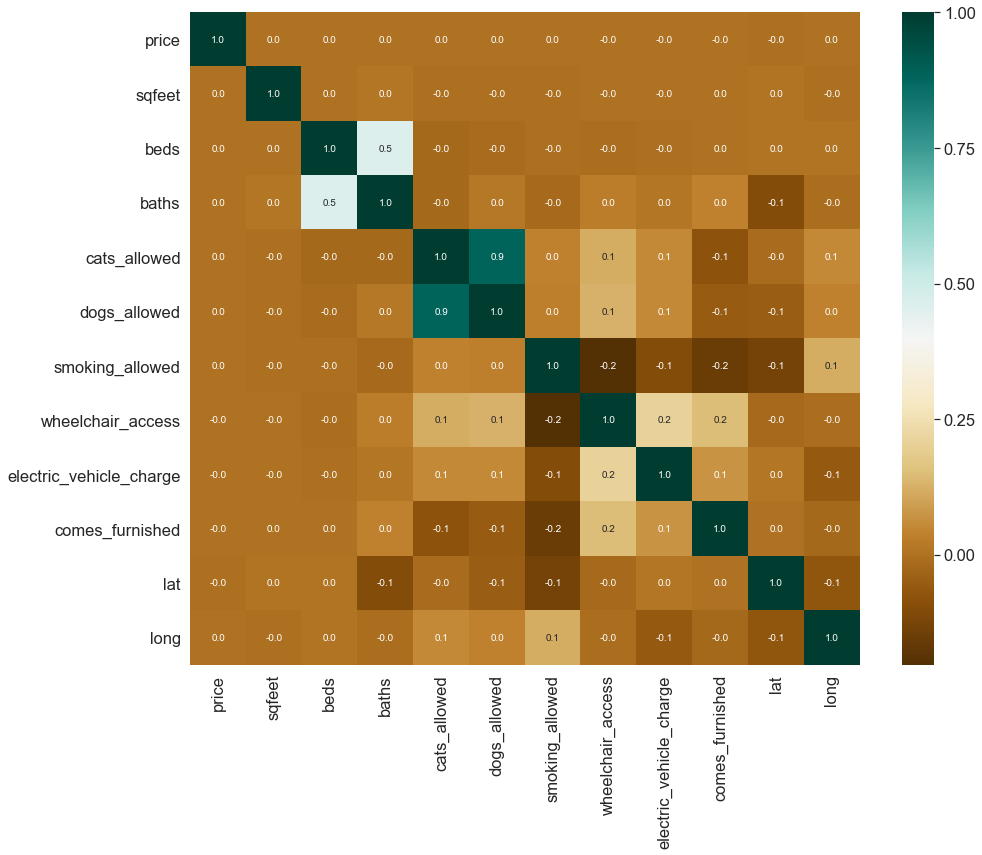

In [34]:
fig, ax = plt.subplots(figsize=(15,12))
corr= data.corr()
sns.heatmap(corr,annot=True,fmt='.1f',ax=ax,cmap='BrBG')
sns.set(font_scale=1.45)
plt.show()

## Feature Engineering and Outlier Removal

In [35]:
train=train[train['price']<train['price'].quantile(0.9996)]
train=train[train['sqfeet']<train['sqfeet'].quantile(0.9996)]
train.shape

(264971, 21)

From the above figure, it is evident that there is almost 0 correlations among the features. We will try to remove the outliers inorder to make features useful for our model

In [36]:
train.drop(train.index[train['sqfeet']==0],inplace=True)
train.drop(train.index[train['price']==0],inplace=True)
train.shape

(264132, 21)

In [37]:
# Let's create some useful feature

In [38]:
train['pp_sqfeet'] = train['price'] / train['sqfeet']

print('Correlation with price: {:.3f}'.format(train['price'].corr(train['pp_sqfeet'])))

Correlation with price: 0.036


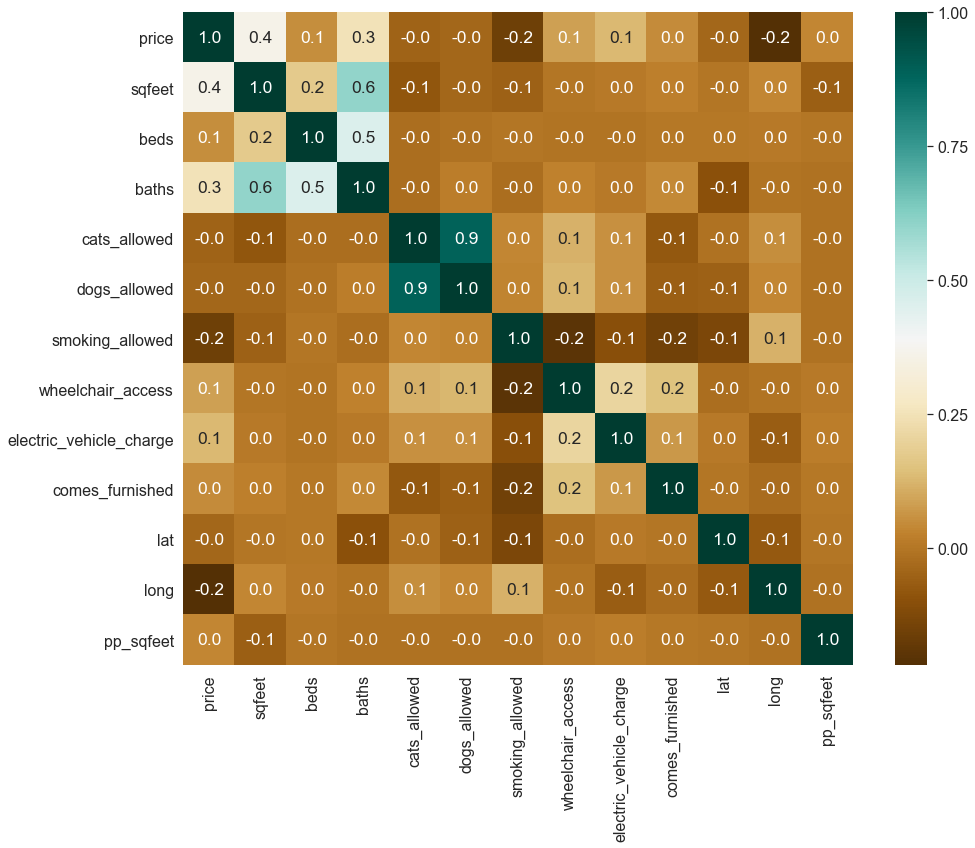

In [39]:
fig, ax = plt.subplots(figsize=(15,12))
corr= train.corr()
sns.heatmap(corr,annot=True,fmt='.1f',ax=ax,cmap='BrBG')
sns.set(font_scale=1.45)
plt.show()

Text(0.5, 1.0, 'Skewness: 88.36966338818549 and Kurtosis: 9321.441687499499')

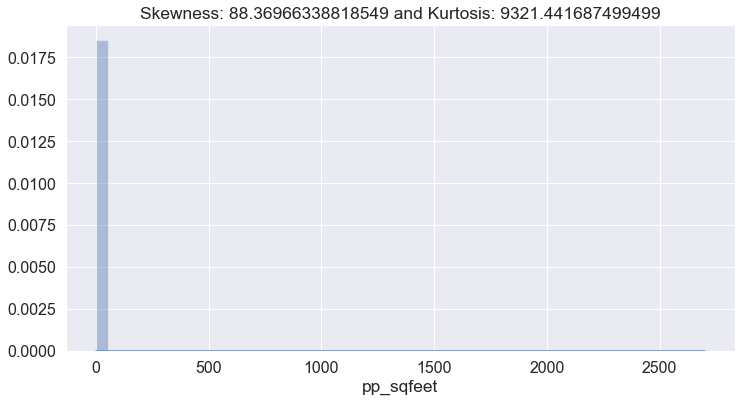

In [40]:
plt.figure(figsize=(12,6))

sns.distplot(train['pp_sqfeet'])
plt.title('Skewness: {} and Kurtosis: {}'.format(train['pp_sqfeet'].skew(),train['pp_sqfeet'].kurtosis()))

In [41]:
temp=pd.DataFrame(train.groupby('region')['pp_sqfeet'].mean()).reset_index()
temp.head()

,region,pp_sqfeet
0,SF bay area,4.360966
1,akron / canton,0.916895
2,albany,1.190351
3,albuquerque,1.076180
4,ames,0.962910


### Removing outliers using pp_sqfeet

In [42]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('region'):
        m=np.mean(subdf.pp_sqfeet)
        st=np.std(subdf.pp_sqfeet)
        reduced_df = subdf[(subdf.pp_sqfeet > (m-st)) & (subdf.pp_sqfeet <= (m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [43]:
data=train.copy()
data.shape

(264132, 22)

In [45]:
data=remove_pps_outliers(data)

In [46]:
data.shape

(245893, 22)

In [47]:
data['pp_sqfeet'].describe()

count    245893.000000
mean          1.307487
std           0.749609
min           0.000333
25%           0.895000
50%           1.126667
75%           1.515695
max          52.307692
Name: pp_sqfeet, dtype: float64

In [48]:
# Lets find out the effect of removing outliers
# our main dataframe train is not free from outliers and data dataframe has been treated with outlier

Correlation with price: 0.036
Correlation with price: 0.598


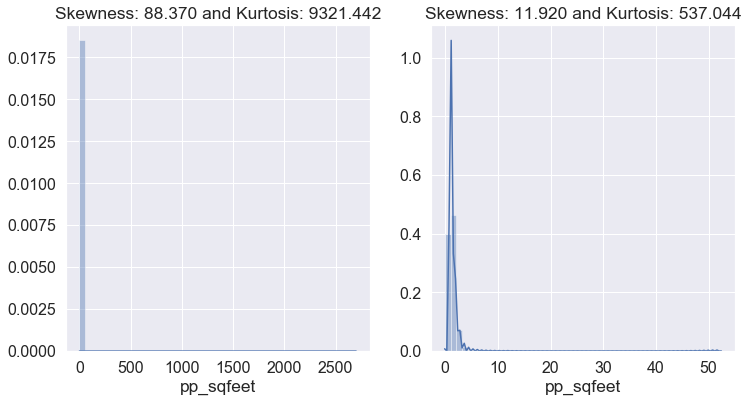

In [49]:
fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(121);
sns.distplot(train['pp_sqfeet'])
plt.title('Skewness: {:.3f} and Kurtosis: {:.3f}'.format(train['pp_sqfeet'].skew(),train['pp_sqfeet'].kurtosis()))

ax2=fig.add_subplot(122);
sns.distplot(data['pp_sqfeet'])
plt.title('Skewness: {:.3f} and Kurtosis: {:.3f}'.format(data['pp_sqfeet'].skew(),data['pp_sqfeet'].kurtosis()))

print('Correlation with price: {:.3f}'.format(train['price'].corr(train['pp_sqfeet'])))
print('Correlation with price: {:.3f}'.format(data['price'].corr(data['pp_sqfeet'])))

# skewness and kurtosis have been substantially reduced. Also, Correlation has improved. 

Correlation with price: 0.361
Correlation with price: 0.398


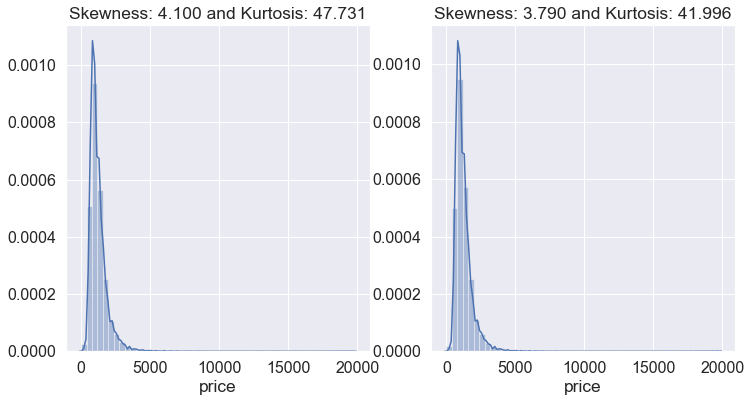

In [50]:
fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(121);
sns.distplot(train['price'])
plt.title('Skewness: {:.3f} and Kurtosis: {:.3f}'.format(train['price'].skew(),train['price'].kurtosis()))

ax2=fig.add_subplot(122);
sns.distplot(data['price'])
plt.title('Skewness: {:.3f} and Kurtosis: {:.3f}'.format(data['price'].skew(),data['price'].kurtosis()))

print('Correlation with price: {:.3f}'.format(train['price'].corr(train['sqfeet'])))
print('Correlation with price: {:.3f}'.format(data['price'].corr(data['sqfeet'])))

# Also, we have improved on other numerical features

Text(0.5, 1.0, 'Skewness: 2.364 and Kurtosis: 14.516')

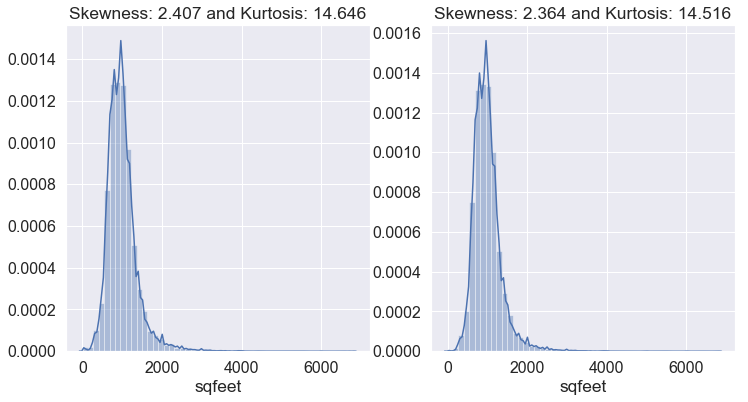

In [51]:
fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(121);
sns.distplot(train['sqfeet'])
plt.title('Skewness: {:.3f} and Kurtosis: {:.3f}'.format(train['sqfeet'].skew(),train['sqfeet'].kurtosis()))

ax2=fig.add_subplot(122);
sns.distplot(data['sqfeet'])
plt.title('Skewness: {:.3f} and Kurtosis: {:.3f}'.format(data['sqfeet'].skew(),data['sqfeet'].kurtosis()))


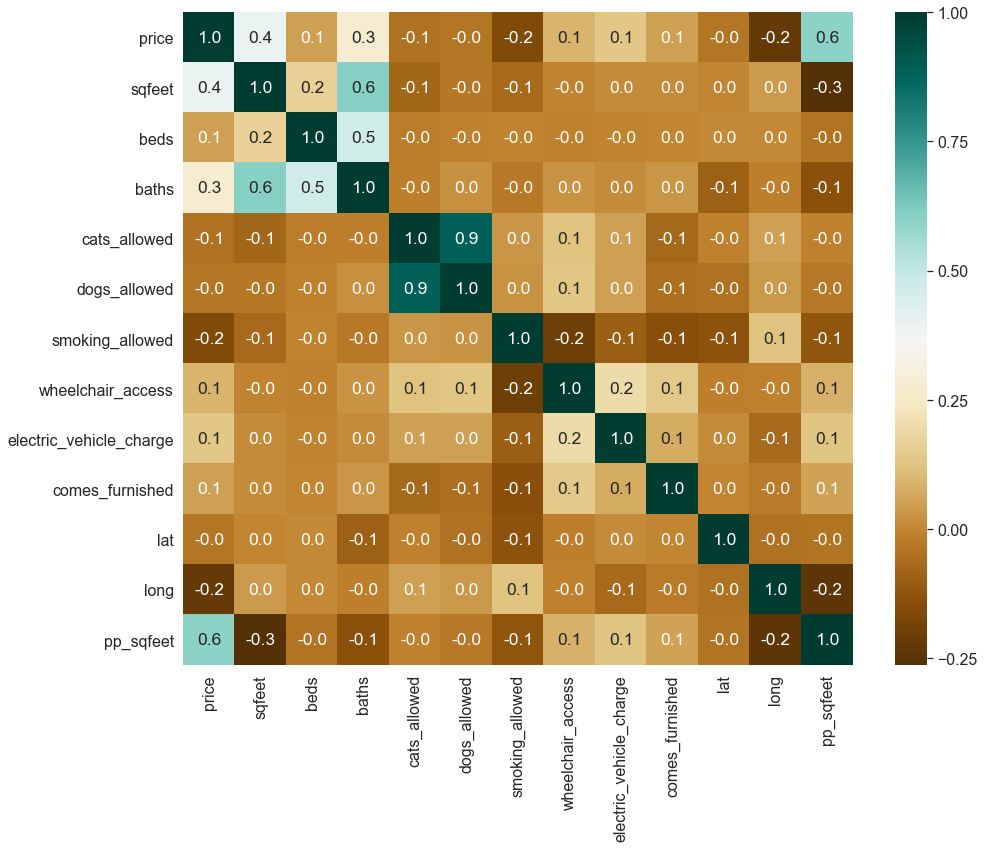

In [52]:
fig, ax = plt.subplots(figsize=(15,12))
corr= data.corr()
sns.heatmap(corr,annot=True,fmt='.1f',ax=ax,cmap='BrBG')
sns.set(font_scale=1.45)
plt.show()

In [53]:
# Clearly, we have improved dataset data, now let us go ahead and remove outliers from our main dataset train

In [54]:
train=remove_pps_outliers(train)
train.shape

(245893, 22)

In [55]:
train=train.loc[(train['beds']<9)] # houses with beds more than 9 are not useful, because we are trying to create more generalized model
train.shape

(245890, 22)

In [56]:
train=train.loc[(train['baths']<9)] # houses with baths more than 9 are not useful, because we are trying to create more generalized model
train.shape

(245890, 22)

In [57]:
temp= pd.DataFrame(train.groupby('beds')['sqfeet'].mean().reset_index())
temp['bedsbysqfeet']= temp['sqfeet']/temp['beds'] 
temp

,beds,sqfeet,bedsbysqfeet
0,0,499.245899,inf
1,1,723.248978,723.248978
2,2,1008.189234,504.094617
3,3,1335.886081,445.295360
4,4,1798.846393,449.711598
5,5,2175.478625,435.095725
6,6,2935.133858,489.188976
7,7,3625.300000,517.900000
8,8,2711.647059,338.955882


In [67]:
# creating new feature beds_X_feet
data=train.copy()
data['beds_x_sqfeet'] = data['beds'] * data['sqfeet']

print('Correlation with price: {:.3f}'.format(data['beds_x_sqfeet'].corr(data['price'])))
data.shape

Correlation with price: 0.340


(245890, 23)

In [68]:

data = data[data['beds']!=0]
data['sqfeet_p_bed'] = data['sqfeet'] / data['beds']


print('Correlation with price: {:.3f}'.format(data['sqfeet_p_bed'].corr(data['price'])))
data.shape

Correlation with price: 0.114


(240038, 24)

In [69]:
# It is not usual that a bedroom has area less than 150 sqft. So, we are going to remove those from our dataset. By doing that we have improved our correlation of the feature beds_x_sqfeet  

In [70]:
data.loc[data['sqfeet_p_bed']<150]

,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,pp_sqfeet,beds_x_sqfeet,sqfeet_p_bed
17,https://sfbay.craigslist.org/eby/apa/d/fremont...,SF bay area,https://sfbay.craigslist.org,2650,apartment,100,3,1.5,0,0,0,0,0,0,w/d in unit,carport,https://images.craigslist.org/00606_lz38mLqjAF...,"Townhouse: 3 Bed, 1.5 Bath, 1199 sq.ft., (1 Fu...",37.5668,-121.9720,ca,26.500000,300,33.333333
1334,https://sfbay.craigslist.org/nby/apa/d/san-raf...,SF bay area,https://sfbay.craigslist.org,3276,apartment,411,3,2.0,1,1,0,0,0,0,w/d in unit,carport,https://images.craigslist.org/00404_FZEiuWRvkW...,Deer Valley Apartments 2500 Deer Valley Rd San...,38.0199,-122.5310,ca,7.970803,1233,137.000000
15422,https://athensga.craigslist.org/apa/d/athens-i...,athens,https://athensga.craigslist.org,432,townhouse,414,4,4.5,1,1,1,1,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00z0z_5Z6wMSDLaZ...,Hi there! Remember âSIZE MATTERSâ!! When ...,33.9173,-83.3884,ga,1.043478,1656,103.500000
17033,https://atlanta.craigslist.org/nat/apa/d/atlan...,atlanta,https://atlanta.craigslist.org,2,apartment,2,2,2.0,1,1,1,0,0,0,w/d hookups,NaN,https://images.craigslist.org/00r0r_cN2NmXGXwa...,Lease today at Corners at 1700. We offer sleek...,33.9437,-84.2492,ga,1.000000,4,1.000000
21490,https://bakersfield.craigslist.org/apa/d/merce...,bakersfield,https://bakersfield.craigslist.org,500,apartment,400,3,2.0,1,1,1,0,0,1,NaN,NaN,https://images.craigslist.org/00K0K_a2UYzjdqBj...,**PROMOTION - Move in with just 1 Month + $500...,37.2983,-120.4650,ca,1.250000,1200,133.333333
24357,https://batonrouge.craigslist.org/apa/d/baton-...,baton rouge,https://batonrouge.craigslist.org,150,house,180,4,3.0,0,0,1,0,0,1,w/d in unit,carport,https://images.craigslist.org/00q0q_7D14oynmnq...,***Read before contacting me*** ***Updated as...,30.3630,-91.0716,la,0.833333,720,45.000000
25980,https://battlecreek.craigslist.org/apa/d/battl...,battle creek,https://battlecreek.craigslist.org,403,house,403,3,1.0,1,1,1,0,0,1,NaN,NaN,https://images.craigslist.org/00n0n_8TLS12wVmR...,"This great home, in a great neighborhood.You w...",42.3030,-85.1304,mi,1.000000,1209,134.333333
26431,https://bemidji.craigslist.org/apa/d/bemidji-b...,bemidji,https://bemidji.craigslist.org,740,apartment,35,2,1.0,0,0,0,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00N0N_8M0M7lWmCp...,Spacious 2 bedroom apartment available immedia...,47.4523,-94.8606,mn,21.142857,70,17.500000
26444,https://bemidji.craigslist.org/apa/d/crookston...,bemidji,https://bemidji.craigslist.org,1,apartment,1,3,1.0,0,0,0,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00909_jIYTXooMRR...,"Broadway Apartments in Crookston, MN has two 3...",47.7863,-96.5986,mn,1.000000,3,0.333333
29314,https://boise.craigslist.org/apa/d/boise-2br-2...,boise,https://boise.craigslist.org,1540,apartment,110,2,2.5,1,1,0,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00m0m_92zOldUkQK...,Resort to a Better Lifestyle Find Your Serenit...,43.5929,-116.1750,id,14.000000,220,55.000000


In [71]:
data=data[data['sqfeet_p_bed']>150]

In [72]:
print('Correlation with price: {:.3f}'.format(data['sqfeet_p_bed'].corr(data['price'])))
data.shape

Correlation with price: 0.113


(239903, 24)

In [73]:
print('Correlation with price: {:.3f}'.format(data['beds_x_sqfeet'].corr(data['price'])))
data.shape

Correlation with price: 0.343


(239903, 24)

In [74]:
data.loc[data['price']<50]

,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,pp_sqfeet,beds_x_sqfeet,sqfeet_p_bed
30114,https://boise.craigslist.org/apa/d/moreland-14...,boise,https://boise.craigslist.org,10,apartment,500,2,0.0,0,0,1,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00303_aP5xRKrW8i...,Camas Apartments Now renting For more inform...,43.1805,-112.3590,id,0.020000,1000,250.000000
31408,https://boston.craigslist.org/bmw/apa/d/framin...,boston,https://boston.craigslist.org,32,house,1800,3,1.0,1,0,0,0,0,1,laundry on site,off-street parking,https://images.craigslist.org/00808_aTPOGV9pwl...,$180/night for all three rooms(6 persons). $11...,42.2735,-71.4161,ma,0.017778,5400,600.000000
46558,https://chico.craigslist.org/apa/d/chico-2955-...,chico,https://chico.craigslist.org,1,house,1345,3,2.0,0,0,1,0,0,0,NaN,NaN,https://images.craigslist.org/01515_78943MTOHk...,The listing on Craig's List Chico for this hou...,39.8032,-121.8670,ca,0.000743,4035,448.333333
46760,https://cincinnati.craigslist.org/apa/d/cincin...,cincinnati,https://cincinnati.craigslist.org,1,apartment,750,2,1.0,1,0,1,0,0,0,laundry in bldg,off-street parking,https://images.craigslist.org/00b0b_aJi0uW6paU...,Newly remodeled 2 bdrm apt is available now fo...,39.1524,-84.5967,oh,0.001333,1500,375.000000
47100,https://cincinnati.craigslist.org/apa/d/cincin...,cincinnati,https://cincinnati.craigslist.org,1,apartment,800,2,1.0,0,0,1,0,0,0,laundry in bldg,off-street parking,https://images.craigslist.org/00T0T_dfk9sEEvnU...,Free heat and water in this secure 9 unit buil...,39.1610,-84.6022,oh,0.001250,1600,400.000000
53566,https://columbiamo.craigslist.org/apa/d/columb...,columbia / jeff city,https://columbiamo.craigslist.org,1,house,1000,2,1.5,1,1,1,0,0,1,w/d in unit,street parking,https://images.craigslist.org/00b0b_6fX5Jr7fMU...,I recently relocated to Columbia partly for wo...,38.9645,-92.3759,mo,0.001000,2000,500.000000
53911,https://columbiamo.craigslist.org/apa/d/jeffer...,columbia / jeff city,https://columbiamo.craigslist.org,1,apartment,900,2,1.0,0,0,1,1,0,0,no laundry on site,off-street parking,https://images.craigslist.org/00V0V_lTx91NWI57...,"Clean, Clean 2 bedroom 900 square foot fully f...",38.5446,-92.2146,mo,0.001111,1800,450.000000
63406,https://desmoines.craigslist.org/apa/d/des-moi...,des moines,https://desmoines.craigslist.org,1,house,2000,5,2.0,0,0,1,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00Y0Y_58M9tc9Ghp...,I have several rentals houses around campus th...,41.5985,-93.6546,ia,0.000500,10000,400.000000
64430,https://desmoines.craigslist.org/apa/d/urbanda...,des moines,https://desmoines.craigslist.org,35,condo,750,2,1.0,0,0,0,0,0,1,laundry in bldg,off-street parking,https://images.craigslist.org/00Y0Y_kRPvUxc1l7...,"Newly upgraded !!!!! Welcome Home, Offering la...",41.5805,-93.7447,ia,0.046667,1500,375.000000
67597,https://eastidaho.craigslist.org/apa/d/idaho-f...,east idaho,https://eastidaho.craigslist.org,1,apartment,700,2,1.0,0,0,0,1,0,0,laundry on site,off-street parking,https://images.craigslist.org/00t0t_dw1QklBnBW...,"At Peterson Park Apartments, you will find eas...",43.4673,-111.9560,id,0.001429,1400,350.000000


In [75]:
data=data[data['price']>50]
data.shape

(239744, 24)

In [76]:
train['beds_x_sqfeet'] = train['beds'] * train['sqfeet']
train= train[(train['sqfeet']/train['beds'])>150]

In [77]:
train.shape

(245755, 23)

In [78]:
print('Correlation with price: {:.3f}'.format(train['beds_x_sqfeet'].corr(train['price'])))

Correlation with price: 0.340


In [79]:
train.pp_sqfeet.describe()

count    245755.000000
mean          1.302156
std           0.664494
min           0.000333
25%           0.895000
50%           1.126394
75%           1.515108
max          39.743590
Name: pp_sqfeet, dtype: float64

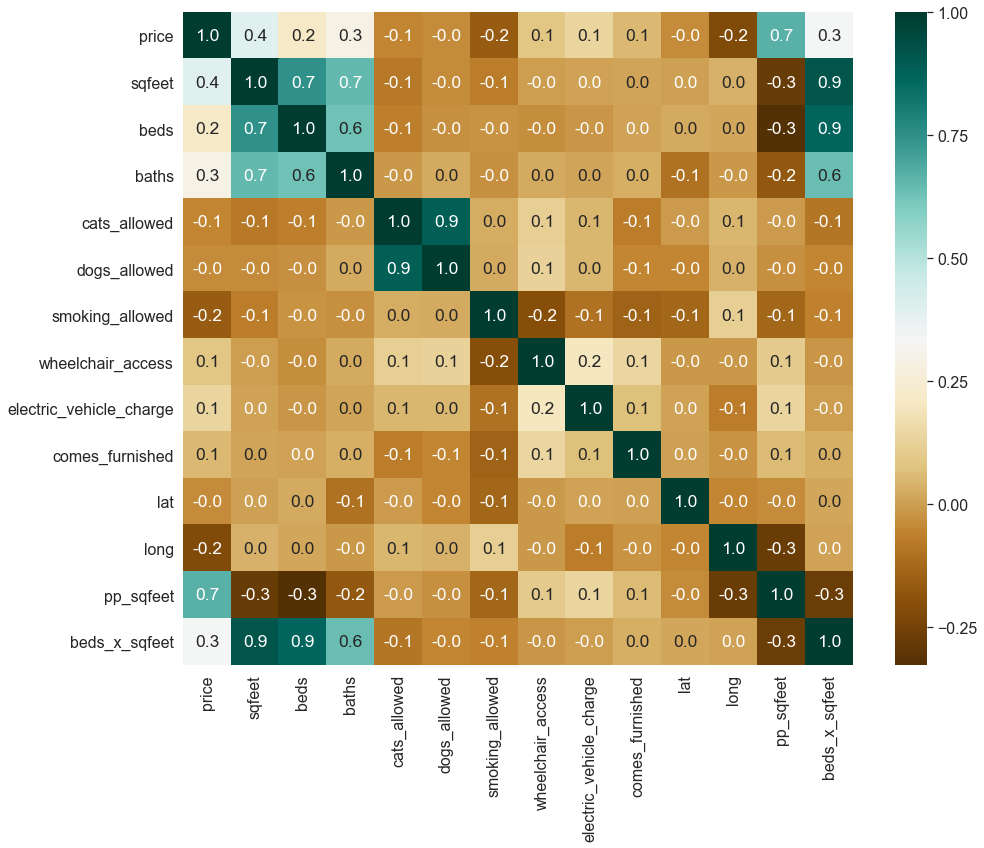

In [80]:
fig, ax = plt.subplots(figsize=(15,12))
corr= train.corr()
sns.heatmap(corr,annot=True,fmt='.1f',ax=ax,cmap='BrBG')
sns.set(font_scale=1.45)
plt.show()

In [81]:
train.columns

Index(['url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state', 'pp_sqfeet', 'beds_x_sqfeet'],
      dtype='object')

In [82]:
data=train.copy()
data.shape

(245755, 23)

In [83]:
# creating new feature beds_x_baths
data['beds_x_baths'] = data['beds'] * data['baths']
print('Correlation: {:.3f}'.format(data['price'].corr(data['beds_x_baths'])))

Correlation: 0.296


In [84]:
data['beds_by_baths'] = data['beds'] / data['baths']
data.loc[data['beds_by_baths']==np.inf]
print('Correlation: {:.3f}'.format(data['price'].corr(data['beds_by_baths'])))

Correlation: nan


In [85]:
m=0
summ=0
for i in data['beds_by_baths']:
    if i == np.Inf:
        pass
    else:
        summ+=i
m = summ/len(data)
m

1.301117894694665

In [86]:
data['beds_by_baths'].replace(np.Inf,m,inplace=True)

In [87]:
data.loc[data['beds_by_baths']==np.inf]

,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,pp_sqfeet,beds_x_sqfeet,beds_x_baths,beds_by_baths


In [88]:
print('Correlation: {:.3f}'.format(data['price'].corr(data['beds_by_baths'])))

Correlation: -0.037


In [89]:
#usually there is no house with bathrooms greater than bedrooms. But for generalizing I have considered the difference to be less than one

In [90]:
data=data[~((data['baths']-data['beds'])>1)]

In [91]:
print('Correlation: {:.3f}'.format(data['price'].corr(data['beds_x_baths'])))

Correlation: 0.296


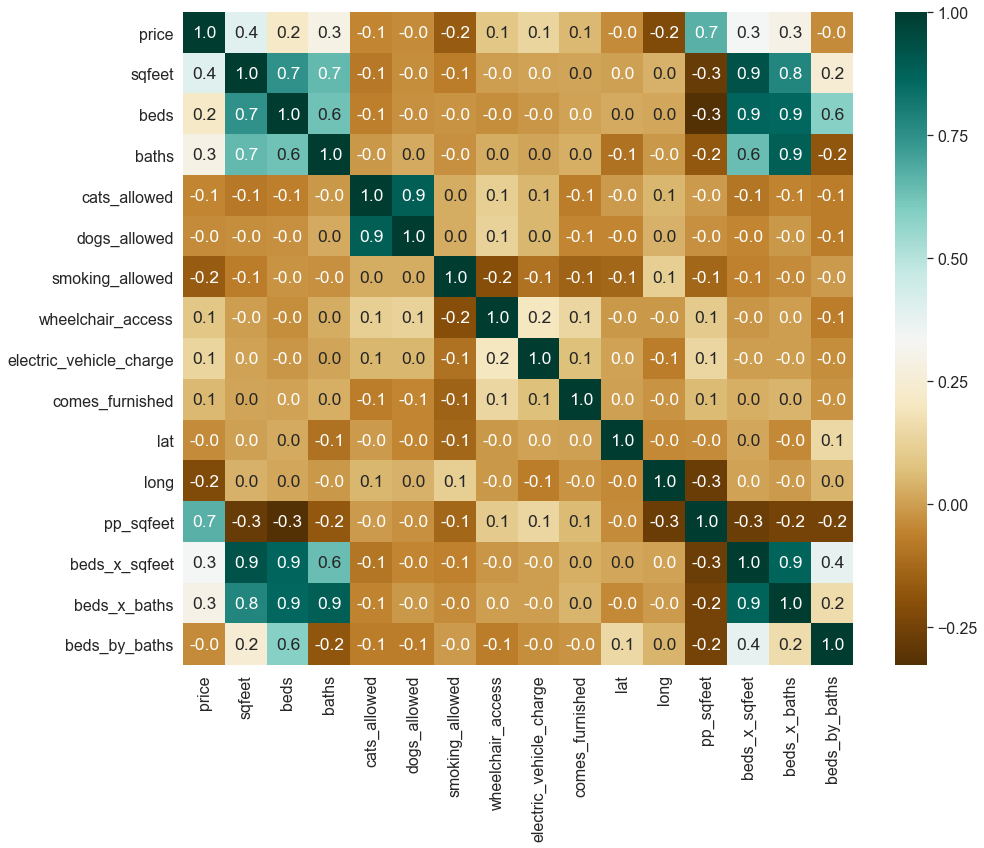

In [92]:
fig, ax = plt.subplots(figsize=(15,12))
corr= data.corr()
sns.heatmap(corr,annot=True,fmt='.1f',ax=ax,cmap='BrBG')
sns.set(font_scale=1.45)
plt.show()

In [93]:
train['beds_x_baths'] = train['beds'] * train['baths']

In [94]:
train_unused = train[['url', 'region_url',  'image_url', 'description', 'lat',
       'long']]

In [95]:
train = train[[ 'region', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options','state', 'pp_sqfeet', 'beds_x_sqfeet','beds_x_baths']]

In [96]:
details = analysis(train,'price')
details

,types,counts,uniques,nulls,distincts,null_perc,skewness,kurtosis,corr price
region,object,245755,"[SF bay area, akron / canton, albany, albuquer...",0,296,0.000000,NaN,NaN,NaN
price,int64,245755,"[3069, 2293, 3033, 2025, 3220, 1601, 2295, 295...",0,3539,0.000000,3.792191,42.043962,1.000000
type,object,245755,"[apartment, duplex, house, condo, flat, in-law...",0,12,0.000000,NaN,NaN,NaN
sqfeet,int64,245755,"[1032, 616, 881, 598, 449, 705, 715, 753, 600,...",0,2670,0.000000,2.376921,14.579430,0.398278
beds,int64,245755,"[2, 1, 0, 3, 4, 5, 6, 7, 8]",0,9,0.000000,0.503886,0.915676,0.214279
baths,float64,245755,"[2.0, 1.0, 2.5, 3.5, 1.5, 3.0, 0.0, 4.0, 5.0, ...",0,14,0.000000,0.748292,1.118015,0.295001
cats_allowed,int64,245755,"[1, 0]",0,2,0.000000,-0.986414,-1.026997,-0.050082
dogs_allowed,int64,245755,"[1, 0]",0,2,0.000000,-0.871577,-1.240363,-0.040745
smoking_allowed,int64,245755,"[0, 1]",0,2,0.000000,-1.081235,-0.830938,-0.160667
wheelchair_access,int64,245755,"[0, 1]",0,2,0.000000,3.174718,8.078901,0.088354


In [97]:
for i in bool_features:
    print(train[i].value_counts())

1    177230
0     68525
Name: cats_allowed, dtype: int64
1    171967
0     73788
Name: dogs_allowed, dtype: int64
1    181314
0     64441
Name: smoking_allowed, dtype: int64
0    226844
1     18911
Name: wheelchair_access, dtype: int64
0    242430
1      3325
Name: electric_vehicle_charge, dtype: int64
0    235275
1     10480
Name: comes_furnished, dtype: int64


In [98]:
# we transform the boolean features to categorical, as we are using Catboost Regressor
for col in bool_features:
    train[col] = train[col].astype('object',copy=False)

## Handle Missing Data

In [99]:
train['laundry_options']= train.groupby('type')['laundry_options'].transform(lambda i : i.fillna(i.mode()[0]))

In [100]:
train['parking_options']= train.groupby('type')['parking_options'].transform(lambda i : i.fillna(i.mode()[0]))

In [101]:
train[train['state'].isna()]

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state,pp_sqfeet,beds_x_sqfeet,beds_x_baths
56033,columbus,1164,townhouse,1300,2,2.5,1,1,0,0,0,0,w/d hookups,attached garage,NaN,0.895385,2600,5.0


In [102]:
train.state[train['region']=='columbus'].head()

53991    ga
53992    ga
53993    ga
53994    ga
53995    ga
Name: state, dtype: object

In [103]:
train['state']=train['state'].fillna('ga')

In [104]:
details = analysis(train,'price')
details

,types,counts,uniques,nulls,distincts,null_perc,skewness,kurtosis,corr price
region,object,245755,"[SF bay area, akron / canton, albany, albuquer...",0,296,0.0,NaN,NaN,NaN
price,int64,245755,"[3069, 2293, 3033, 2025, 3220, 1601, 2295, 295...",0,3539,0.0,3.792191,42.043962,1.000000
type,object,245755,"[apartment, duplex, house, condo, flat, in-law...",0,12,0.0,NaN,NaN,NaN
sqfeet,int64,245755,"[1032, 616, 881, 598, 449, 705, 715, 753, 600,...",0,2670,0.0,2.376921,14.579430,0.398278
beds,int64,245755,"[2, 1, 0, 3, 4, 5, 6, 7, 8]",0,9,0.0,0.503886,0.915676,0.214279
baths,float64,245755,"[2.0, 1.0, 2.5, 3.5, 1.5, 3.0, 0.0, 4.0, 5.0, ...",0,14,0.0,0.748292,1.118015,0.295001
cats_allowed,object,245755,"[1, 0]",0,2,0.0,NaN,NaN,NaN
dogs_allowed,object,245755,"[1, 0]",0,2,0.0,NaN,NaN,NaN
smoking_allowed,object,245755,"[0, 1]",0,2,0.0,NaN,NaN,NaN
wheelchair_access,object,245755,"[0, 1]",0,2,0.0,NaN,NaN,NaN


In [105]:
y = train['price']
X = train.copy()
X.drop('price',axis=1,inplace=True)

In [106]:
skew_data=details[abs(details['skewness'])> 0.5]
skew_data.drop('price',inplace=True)
skew_data.drop('beds',inplace=True)
skew_data.drop('baths',inplace=True)
skew_data

C:\Users\Neeraj Bhadani\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,types,counts,uniques,nulls,distincts,null_perc,skewness,kurtosis,corr price
sqfeet,int64,245755,"[1032, 616, 881, 598, 449, 705, 715, 753, 600,...",0,2670,0.0,2.376921,14.579430,0.398278
pp_sqfeet,float64,245755,"[2.9738372093023258, 3.7224025974025974, 3.442...",0,57371,0.0,3.862150,80.586752,0.672699
beds_x_sqfeet,int64,245755,"[2064, 616, 1762, 0, 705, 715, 753, 600, 2240,...",0,5104,0.0,3.647389,32.108801,0.340397
beds_x_baths,float64,245755,"[4.0, 1.0, 0.0, 6.0, 2.0, 3.0, 8.0, 12.5, 10.5...",0,41,0.0,2.043277,10.608315,0.295884


In [107]:
data=train.copy()
from scipy.special import boxcox1p
skewed_features = skew_data.index
lam = 0.5
for feat in skewed_features:
    data[feat] = boxcox1p(data[feat], lam)

In [108]:
details = analysis(data,'price')
details

,types,counts,uniques,nulls,distincts,null_perc,skewness,kurtosis,corr price
region,object,245755,"[SF bay area, akron / canton, albany, albuquer...",0,296,0.0,NaN,NaN,NaN
price,int64,245755,"[3069, 2293, 3033, 2025, 3220, 1601, 2295, 295...",0,3539,0.0,3.792191,42.043962,1.000000
type,object,245755,"[apartment, duplex, house, condo, flat, in-law...",0,12,0.0,NaN,NaN,NaN
sqfeet,float64,245755,"[62.280634719952786, 47.678969393496885, 57.39...",0,2670,0.0,1.003024,3.993743,0.383922
beds,int64,245755,"[2, 1, 0, 3, 4, 5, 6, 7, 8]",0,9,0.0,0.503886,0.915676,0.214279
baths,float64,245755,"[2.0, 1.0, 2.5, 3.5, 1.5, 3.0, 0.0, 4.0, 5.0, ...",0,14,0.0,0.748292,1.118015,0.295001
cats_allowed,object,245755,"[1, 0]",0,2,0.0,NaN,NaN,NaN
dogs_allowed,object,245755,"[1, 0]",0,2,0.0,NaN,NaN,NaN
smoking_allowed,object,245755,"[0, 1]",0,2,0.0,NaN,NaN,NaN
wheelchair_access,object,245755,"[0, 1]",0,2,0.0,NaN,NaN,NaN


## Model using CatBoost Regressor

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test =train_test_split(X,y,train_size=0.75,random_state=25) 

C:\Users\Neeraj Bhadani\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [110]:
categorical_features_indices = np.where(X.dtypes == 'object')[0]

In [111]:
categorical_features_indices

array([ 0,  1,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64)

In [2]:
from sklearn.linear_model import LinearRegression as lr
model = lr()
lr.fit(X_train,y_train)

In [112]:
from catboost import CatBoostRegressor
model=CatBoostRegressor(iterations=50, depth=3, learning_rate=0.25, loss_function='RMSE')
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 564.2842263	test: 566.4586596	best: 566.4586596 (0)	total: 301ms	remaining: 14.7s
1:	learn: 494.2503356	test: 496.8011254	best: 496.8011254 (1)	total: 411ms	remaining: 9.86s
2:	learn: 437.8601925	test: 439.7494374	best: 439.7494374 (2)	total: 476ms	remaining: 7.45s
3:	learn: 392.4690273	test: 395.0591261	best: 395.0591261 (3)	total: 509ms	remaining: 5.85s
4:	learn: 353.5860262	test: 355.9253588	best: 355.9253588 (4)	total: 539ms	remaining: 4.85s
5:	learn: 323.1023255	test: 325.0264152	best: 325.0264152 (5)	total: 570ms	remaining: 4.18s
6:	learn: 293.6652913	test: 295.7062618	best: 295.7062618 (6)	total: 597ms	remaining: 3.67s
7:	learn: 271.5613810	test: 273.4967775	best: 273.4967775 (7)	total: 625ms	remaining: 3.28s
8:	learn: 249.3857424	test: 251.2175281	best: 251.2175281 (8)	total: 658ms	remaining: 3s
9:	learn: 232.5553570	test: 234.3313770	best: 234.3313770 (9)	total: 687ms	remaining: 2.75s
10:	learn: 215.4748321	test: 217.1916415	best: 217.1916415 (10)	total: 717ms	remain

In [113]:
y_prdeict = model.predict(X_test)


In [114]:
y_test.head()

36624     1095
84652     1265
220920    1010
145411    2900
8877       840
Name: price, dtype: int64

In [115]:
y_prdeict[:5]

array([1126.53016398, 1260.68071149, 1010.8076758 , 3062.98142261,
        897.16302819])

In [116]:
model.score(X_test,y_test)

0.9794611267088295